# Import the libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

# Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#  Explore the data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

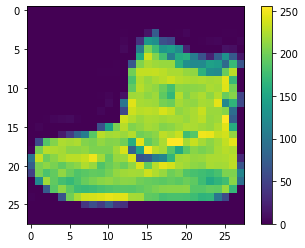

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocess the data

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

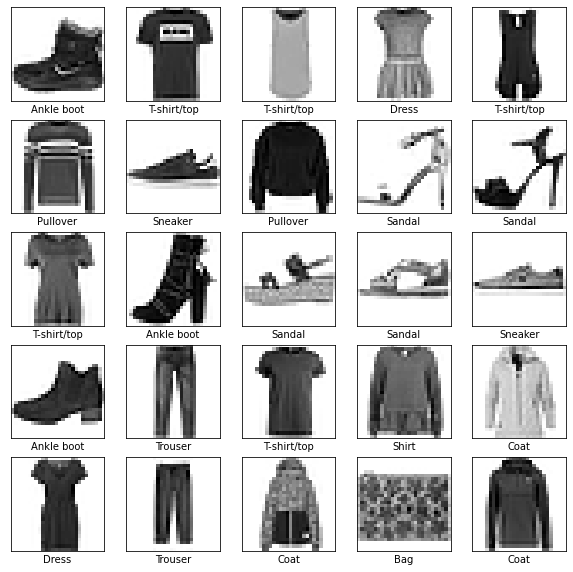

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

1. Stacked Autoencoder

In [9]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))


history = stacked_ae.fit(train_images, train_images, epochs=10, validation_data=[test_images, test_images])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3356 - val_loss: 0.3147
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3051 - val_loss: 0.3017
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2980 - val_loss: 0.2974
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - val_loss: 0.2928
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2908 - val_loss: 0.2938
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2889 - val_loss: 0.2911
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2875 - val_loss: 0.2899
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2864 - val_loss: 0.2878
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2855 - val_loss: 0.2872
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.284

# Visualizing the Reconstructions

In [10]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")


def show_reconstructions(model, n_images=5):
  reconstructions = model.predict(test_images[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))

  for image_index in range(n_images):

    plt.subplot(2, n_images, 1 + image_index) 

    plot_image(test_images[image_index])  

    plt.subplot(2, n_images, 1 + n_images + image_index)

    plot_image(reconstructions[image_index])  


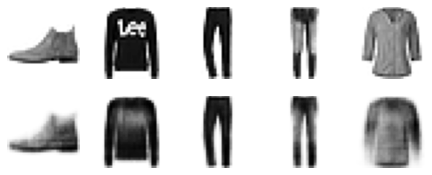

In [11]:
show_reconstructions(stacked_ae)

2. Denoising Autoencoders

In [12]:
denoising_encoder = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

history_d = denoising_ae.fit(train_images, train_images, epochs=10, validation_data=[test_images, test_images])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3420 - val_loss: 0.3145
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - val_loss: 0.3055
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3079 - val_loss: 0.3036
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3050 - val_loss: 0.3016
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - val_loss: 0.2984
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3014 - val_loss: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3002 - val_loss: 0.2960
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2991 - val_loss: 0.2945
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - val_loss: 0.2941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.297

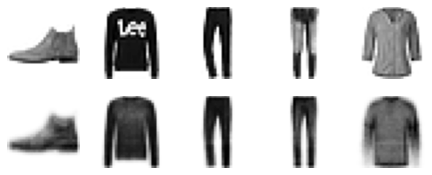

In [13]:
show_reconstructions(denoising_ae)